il faudrait maintenant faire des statistiques descriptives avec les données sur lesquelles on travaille pour être très rigoureux

In [76]:
import pandas as pd
from _jointure_validations_stations import df_jointure_validations_stations
import matplotlib.pyplot as plt
from _pre_proces_stations import df_stations

In [34]:
!pip install plotly

In [35]:
import plotly.express as px

In [3]:
data=df_jointure_validations_stations()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [4]:
data.head()

,JOUR,lda,CATEGORIE_TITRE,NB_VALD,Mois,Année,Geo Point,Geo Shape,gares_id,nom_long,...,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt,,res_com
0,2023-01-01,59830,NON DEFINI,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
1,2023-01-01,59830,AMETHYSTE,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
2,2023-01-01,59830,FGT,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
3,2023-01-01,59830,IMAGINE R,82,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
4,2023-01-01,59830,NAVIGO,101,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C


In [5]:
data.columns

Index(['JOUR', 'lda', 'CATEGORIE_TITRE', 'NB_VALD', 'Mois', 'Année',
       'Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar',
       'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA',
       'idrefliga', 'idrefligc', 'indice_lig', 'mode_', 'tertrain', 'terrer',
       'termetro', 'tertram', 'terval', 'exploitant', 'idf', 'principal', 'x',
       'y', 'picto ligne', 'nom_iv', 'geometry', 'index_right', 'idcar_1km',
       'i_est_1km', 'lcog_geo', 'ind', 'men', 'men_pauv', 'men_1ind',
       'men_5ind', 'men_prop', 'men_fmp', 'ind_snv', 'men_surf', 'men_coll',
       'men_mais', 'log_av45', 'log_45_70', 'log_70_90', 'log_ap90', 'log_inc',
       'log_soc', 'ind_0_3', 'ind_4_5', 'ind_6_10', 'ind_11_17', 'ind_18_24',
       'ind_25_39', 'ind_40_54', 'ind_55_64', 'ind_65_79', 'ind_80p',
       'ind_inc', 'pre_IDF', 'select', 'expt', '', 'res_com'],
      dtype='object')

## Sur la fréquentation des stations de RER
Les données de validations sont obtenues à partir de tous les supports de télé-billetiques : cela signifie que les tickets en carton ne sont pas pris en compte, seuls les pass Navigo sont comptabilisés dans ces données. Voici quelques précisions sur les différentes catégories de titre : 
- **IMAGINE R** : regroupe les forfaits annuels Imagine R Scolaire et Imagine R Etudiant, forfaits réservés aux élèves, apprentis et étudiants qui permet de voyager à volonté toute l’année et dans toute l Ile-de-France.
- **NAVIGO** : regroupe les forfaits Navigo Annuel, Navigo Mois et Navigo Semaine.
- **AMETHYSTE** : comptabilise les forfaits Améthyste : forfait réservé aux personnes âgées ou handicapées sous conditions de ressources ou de statut, et résidant en Île-de-France. Ce forfait
annuel permet à son bénéficiaire de se déplacer de manière illimitée sur tous les modes de transport à l intérieur des zones de validité.
- **TST** : regroupe les forfaits hebdomadaires et mensuels à tarif réduit, accordé aux bénéficiaires
de la Réduction Solidarité Transport, pour voyager à l’intérieur des zones choisies sur tous les
modes de transport en Île-de-France.
- **FGT** : comptabilise les Forfaits Navigo Gratuité Transport, forfait qui permet à certain bénéficiaire d’aides sociales de voyager gratuitement dans toute l’Île-de-France.
- **AUTRE TITRE** : comptabilise les forfaits spéciaux.
- **NON DEFINI** : comptabilise les validations dont le type de titre n’est pas défini (anomalies).

Ensuite, il est important de noter qu'il s'agit de validations uniquement à l'entrée des stations. Il n'est donc pas question ici d'analyser les déplacements, de plutot de voir la fréquentation en "entrée" des stations. Pour restreindre notre analyse avec le temps que l'on a pour réaliser ce projet nous avons décider de nous restreindre uniquement aux stations de *RER*.

### Fréquentation
Dans un premier temps on s'interresse aux données de fréquentation brutes, sur tous les jours du premier semestre 2023 sur les stations de *RER*.

In [16]:
data.shape

(327424, 70)

In [13]:
data.loc[:,['NB_VALD']].describe()

,NB_VALD
count,327424.00000
mean,1004.92835
std,3786.49506
min,5.00000
25%,28.00000
50%,143.00000
75%,629.00000
max,128664.00000


Il y a, en moyenne, 1005 validations par jour dans les stations du *RER*, cependant cette moyenne cache de très gros écart. Il y a des stations qui sont extrèmement peu fréquentée : la documentation d'ÎDFM indique que lorsque le nombre de validations est inférieur à 5 mais strictement positif, la donnée est tronquée à 5 pour respecter les exigences de la CNIL.

#### Stations de RER très peu fréquentées

Une information statistique de ce tableau est également très interessante : le Q3 est inférieur à la moyenne : cela signifie que la fréquentation de certaines stations est si grande qu'elle "gonfle" la moyenne. Ces stations sont donc peu nombreuses au vue du nombre de stations totales du *RER* mais pourtant ce sont elles qui canalisent le plus de validation.

Pour identifier les stations avec les plus faibles validations on aggrégèe les données par jour (et donc on enlève les catégories). Il faut bien prendre en compte que le nombre de validations minimales gardé est de 5, et donc que, en aggrégeant par catégorie de pass Navigo on aura mécaniquement plus de validations (l'approximation sera gonflée). Si il n'y a aucune validation dans la journée pour un titre specifique la colonne est soit à 0 soit inexistante.

In [128]:
freq=data.loc[:,['JOUR', 'nom_long', 'CATEGORIE_TITRE', 'NB_VALD']]
freq_stations = freq.groupby(['JOUR', 'nom_long'])['NB_VALD'].sum().reset_index()
freq_stations

,JOUR,nom_long,NB_VALD
0,2023-01-01,Ablon,336
1,2023-01-01,Achères-Grand-Cormier,23
2,2023-01-01,Achères-Ville,872
3,2023-01-01,Antony,2237
4,2023-01-01,Arcueil-Cachan,1612
...,...,...,...
42041,2023-06-30,Épinay-sur-Seine,5184
42042,2023-06-30,Étampes,2583
42043,2023-06-30,Étréchy,612
42044,2023-06-30,Évry,713


In [129]:
faible_freq=freq_stations[freq_stations['NB_VALD'] <= 50]
faible_freq

,JOUR,nom_long,NB_VALD
1,2023-01-01,Achères-Grand-Cormier,23
16,2023-01-01,Boigneville,17
17,2023-01-01,Boissise-le-Roi,31
23,2023-01-01,Boutigny,23
29,2023-01-01,Buno-Gironville,15
...,...,...,...
41869,2023-06-30,Dourdan-la-Forêt,27
41946,2023-06-30,Musée d'Orsay,5
41993,2023-06-30,Saint-Fargeau,20
42010,2023-06-30,Sermaise,10


**commenter**

In [139]:
faible_freq_stations=faible_freq.loc[:,['nom_long']]
liste_faible_freq_stations= faible_freq_stations['nom_long'].value_counts()
liste_faible_freq_stations

nom_long
Vosves                          160
Boigneville                     160
Sermaise                        150
Le Plessis-Chenet               144
Buno-Gironville                 121
                               ... 
Nogent-le-Perreux                 1
Créteil Pompadour                 1
Aéroport Charles De Gaulle 1      1
Villepinte                        1
Javel                             1
Name: count, Length: 115, dtype: int64

**commenter**

*Les prochains graphiques sont interractifs*

In [140]:
df=liste_faible_freq_stations.reset_index()
df.columns=['Station de RER', 'Nb de jours avec moins de 50 validations']
liste_faible_freq_stations=df.merge(stations, left_on="Station de RER", right_on="nom_long")

In [135]:
couleurs_res_com = {
    'RER A': 'red', 'RER B': 'blue', 'RER C': 'yellow',
    'RER D': 'green', 'RER E': 'pink'}

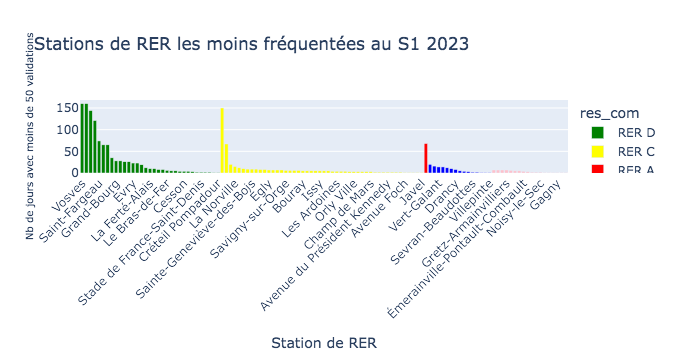

In [141]:
fig = px.bar(liste_faible_freq_stations, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023',
            color_discrete_map=couleurs_res_com)

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes de l'axe des abscisses
#fig.update_traces(marker_color='skyblue')  # La couleur par défaut des barres, peut être écrasée par 'color'
fig.update_yaxes(title_font=dict(size=10))  # Réduire la taille de la police pour l'axe des ordonnées

# Afficher le graphique
fig.show()

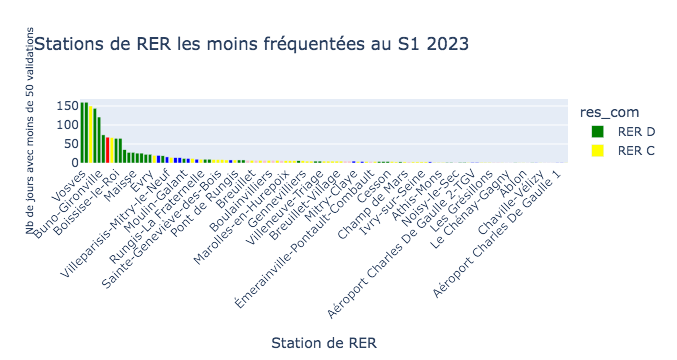

In [143]:
# Trier le DataFrame par 'Nb de jours avec moins de 50 validations' en ordre décroissant
df_sorted = liste_faible_freq_stations.sort_values(by='Nb de jours avec moins de 50 validations', ascending=False)

# Créer un graphique en barres interactif avec des couleurs conditionnelles
fig = px.bar(df_sorted, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023',
             color_discrete_map=couleurs_res_com,
             category_orders={"Station de RER": df_sorted['Station de RER'].tolist()})  # Définir l'ordre des catégories

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)
fig.update_yaxes(title_font=dict(size=10))

# Afficher le graphique
fig.show()

**commenter**

**rajouter une section sur les lignes** ou pas d'interet avec la classification déjà faite ??

In [173]:
faible_freq.sort_values(by="NB_VALD", ascending=True).head()

,JOUR,nom_long,NB_VALD
9832,2023-02-12,Dourdan-la-Forêt,5
21022,2023-04-01,Saint-Gratien,5
21082,2023-04-02,Avenue Henri Martin,5
17680,2023-03-18,Grand-Bourg,5
17706,2023-03-18,Le Coudray-Montceaux,5


#### Stations de RER très fréquentées

In [161]:
haute_freq=freq_stations[freq_stations['NB_VALD'] >= 700]
haute_freq

,JOUR,nom_long,NB_VALD
2,2023-01-01,Achères-Ville,872
3,2023-01-01,Antony,2237
4,2023-01-01,Arcueil-Cachan,1612
7,2023-01-01,Auber,2420
8,2023-01-01,Aulnay-sous-Bois,4053
...,...,...,...
42040,2023-06-30,Épinay-sur-Orge,3715
42041,2023-06-30,Épinay-sur-Seine,5184
42042,2023-06-30,Étampes,2583
42044,2023-06-30,Évry,713


**commenter**

In [162]:
haute_freq_stations=haute_freq.loc[:,['nom_long']]
liste_haute_freq_stations= haute_freq_stations['nom_long'].value_counts()
liste_haute_freq_stations

nom_long
Sucy-Bonneuil               181
Torcy                       181
Val d'Europe                181
Val de Fontenay             181
Saint-Denis                 181
                           ... 
Étréchy                      62
Les Yvris-Noisy-le-Grand     51
Rungis-La Fraternelle        48
Gretz-Armainvilliers         30
Évry                         24
Name: count, Length: 205, dtype: int64

**commenter**

*Les prochains graphiques sont interractifs*

In [163]:
df=liste_haute_freq_stations.reset_index()
df.columns=['Station de RER', 'Nb de jours avec plus de 700 validations']
liste_haute_freq_stations=df.merge(stations, left_on="Station de RER", right_on="nom_long")

In [164]:
couleurs_res_com = {
    'RER A': 'red', 'RER B': 'blue', 'RER C': 'yellow',
    'RER D': 'green', 'RER E': 'pink', 'RER E, RER A': 'black',
    'RER A, RER B, RER D': 'black', 'RER D, RER A':'black', 
    'RER B, RER D, RER E': 'black', 'RER C, RER D':'black',
    'RER B, RER C':'black', 'RER C, RER B':'black'}

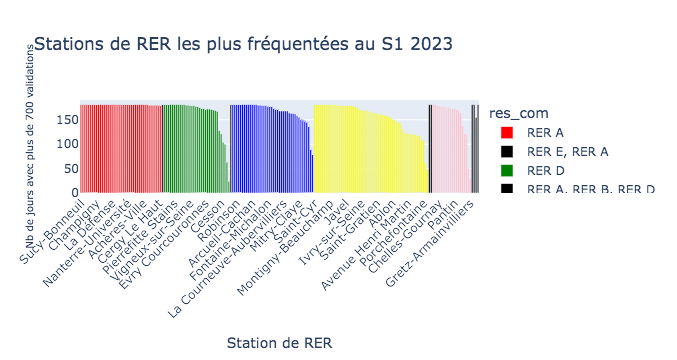

In [165]:
fig = px.bar(liste_haute_freq_stations, x='Station de RER', y='Nb de jours avec plus de 700 validations', color='res_com',
             title='Stations de RER les plus fréquentées au S1 2023',
            color_discrete_map=couleurs_res_com)

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes de l'axe des abscisses
#fig.update_traces(marker_color='skyblue')  # La couleur par défaut des barres, peut être écrasée par 'color'
fig.update_yaxes(title_font=dict(size=10))  # Réduire la taille de la police pour l'axe des ordonnées

# Afficher le graphique
fig.show()

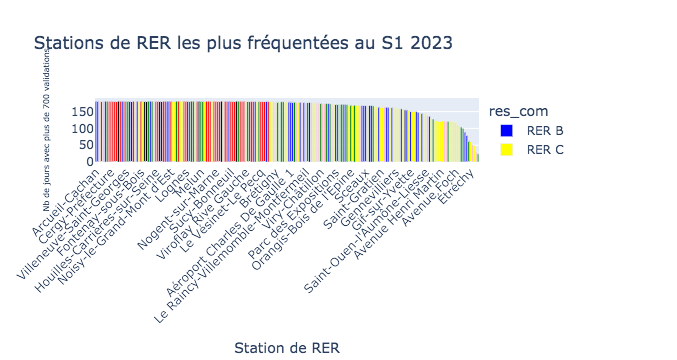

In [167]:
# Trier le DataFrame par 'Nb de jours avec moins de 50 validations' en ordre décroissant
df_sorted = liste_haute_freq_stations.sort_values(by='Nb de jours avec plus de 700 validations', ascending=False)

# Créer un graphique en barres interactif avec des couleurs conditionnelles
fig = px.bar(df_sorted, x='Station de RER', y='Nb de jours avec plus de 700 validations', color='res_com',
             title='Stations de RER les plus fréquentées au S1 2023',
             color_discrete_map=couleurs_res_com,
             category_orders={"Station de RER": df_sorted['Station de RER'].tolist()})  # Définir l'ordre des catégories

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)
fig.update_yaxes(title_font=dict(size=8))

# Afficher le graphique
fig.show()

**Rajouter sur les stations les plus fréquentées en absloue : les valeurs extrèmes par jours**

In [174]:
haute_freq.sort_values(by="NB_VALD", ascending=False).head(15)

,JOUR,nom_long,NB_VALD
39760,2023-06-21,Châtelet-Les Halles,255400
41393,2023-06-28,Châtelet-Les Halles,194301
41626,2023-06-29,Châtelet-Les Halles,192060
3822,2023-01-17,La Défense,191318
3083,2023-01-14,Châtelet-Les Halles,189522
31607,2023-05-17,Châtelet-Les Halles,188804
4703,2023-01-21,Châtelet-Les Halles,188605
35563,2023-06-03,Châtelet-Les Halles,188017
7962,2023-02-04,Châtelet-Les Halles,184162
30678,2023-05-13,Châtelet-Les Halles,183644


In [177]:
haute_freq[haute_freq['nom_long']!='Châtelet-Les Halles'].sort_values(by="NB_VALD", ascending=False).head(15)

,JOUR,nom_long,NB_VALD
3822,2023-01-17,La Défense,191318
2187,2023-01-10,La Défense,180650
2655,2023-01-12,La Défense,178947
4056,2023-01-18,La Défense,178020
2421,2023-01-11,La Défense,175723
5444,2023-01-24,La Défense,170976
1018,2023-01-05,La Défense,168556
5912,2023-01-26,La Défense,166783
3588,2023-01-16,La Défense,166710
1953,2023-01-09,La Défense,165460


In [185]:
idx = haute_freq.groupby('nom_long')['NB_VALD'].idxmax()

# Utiliser les indices pour récupérer les lignes correspondantes du DataFrame original
result = haute_freq.loc[idx]
result = result.sort_values(by="NB_VALD", ascending=False)

# Afficher le résultat
result.head(15)

,JOUR,nom_long,NB_VALD
39760,2023-06-21,Châtelet-Les Halles,255400
3822,2023-01-17,La Défense,191318
34647,2023-05-30,Gare de Lyon,143557
8449,2023-02-06,Gare du Nord,101716
10397,2023-02-14,Paris Austerlitz,65066
9682,2023-02-11,Nation,46739
39899,2023-06-21,Saint-Michel,46576
5373,2023-01-24,Bibliothèque François Mitterrand,46467
39521,2023-06-20,Charles De Gaulle-Étoile,39902
18205,2023-03-20,Neuilly Porte Maillot,39193


## Sur les carreaux INSEE